In [1]:
import csv
import math 
import networkx as nx
import numpy as np
from operator import itemgetter
from numpy import linalg as LA

In [2]:
G=nx.Graph()
f=open("bio-celegans.txt","r")
#f = open("C:/Users/endur/example.txt", "r")
edge1=[]
edge2=[]
nodelist=[]
for x in f:
    e1,e2=x.split()
    edge1.append(int(e1)-1)
    edge2.append(int(e2)-1)
    for i in (int(e1)-1,int(e2)-1):
        if i not in nodelist:
            nodelist.append(i)
n=len(nodelist)

for  i in range(0, len(edge1)):
    G.add_edge(edge1[i], edge2[i])
D={node:val for (node, val) in G.degree()}
B=nx.betweenness_centrality(G)
C=nx.closeness_centrality(G)
CC=nx.clustering(G)
G1 = nx.DiGraph(G)
pr = nx.pagerank(G1, alpha=0.85)
#print(pr)

L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
#print("Largest eigenvalue:", max(e))
#phi = (1 + math.sqrt(max(e))) / 2.0
kc= nx.katz_centrality(G,0.01)
#print(kc)
def LGC(v, alpha):
    sum=0
    for u in nodelist:
        if v!=u:
            d_ij=nx.shortest_path_length(G, source=u, target=v)
            #print(d_ij)
            #print(D[u])
            sum=sum+(math.sqrt(D[u]+alpha))/d_ij
    return sum*(D[v]/n)

lgc={}
alpha=0.5
for v in nodelist:
    lgc[v]=LGC(v,alpha)


def get_key(dictionay, val):
    for key, value in dictionay.items():
         if val == value:
             return key

def get_vertices(List):
    if type(List)==list:
        res = sorted(range(len(List)), key = lambda sub: List[sub])
        return res
    if type(List)==dict:
        res = dict(sorted(List.items(), key = itemgetter(1), reverse = True)) 
        return res

#for Degree centrality values and vertices
vertices_dd=get_vertices(D)
vertices_d=[]
values_d=[]
for i in vertices_dd:
    vertices_d.append(i)
    values_d.append(vertices_dd[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("vertices of D ", vertices_d)
print("\nvalue of D: ", values_d)

#for betweenness values and vertices   
vertices_bwd=get_vertices(B)
vertices_bw=[]
values_bw=[]
for i in vertices_bwd:
    vertices_bw.append(i)
    values_bw.append(vertices_bwd[i])
#vertices_bw.reverse()
#values_bw.reverse()
print("\nvertices of bw ", vertices_bw)
print("\nvalue of bw: ", values_bw)


#for closeness centrality values and vertices
vertices_ccd=get_vertices(C)
vertices_closec=[]
values_closec=[]
for i in vertices_ccd:
    vertices_closec.append(i)
    values_closec.append(vertices_ccd[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of closec ", vertices_closec)
print("\nvalue of closec: ", values_closec)


#for clustering coefficent centrality values and vertices
vertices_clustcd=get_vertices(CC)
vertices_clustc=[]
values_clustc=[]
for i in vertices_clustcd:
    vertices_clustc.append(i)
    values_clustc.append(vertices_clustcd[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of clustc ", vertices_clustc)
print("\nvalue of clustc: ", values_clustc)



#for page rank values and vertices
vertices_pr=get_vertices(pr)
vertices_p=[]
values_p=[]
for i in vertices_pr:
    vertices_p.append(i)
    values_p.append(vertices_pr[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of pr ", vertices_p)
print("\nvalue of pr: ", values_p)


#for Katz Centrality values and vertices
vertices_kc=get_vertices(kc)
vertices_k=[]
values_k=[]
for i in vertices_kc:
    vertices_k.append(i)
    values_k.append(vertices_kc[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of kc ", vertices_k)
print("\nvalue of kc: ", values_k)


#for lgc centrality values and vertices

vertices_lgc=get_vertices(lgc)
vertices_l=[]
values_l=[]
for i in vertices_lgc:
    vertices_l.append(i)
    values_l.append(vertices_lgc[i])
#vertices_cc.reverse()
#values_cc.reverse()
print("\nvertices of lgc ", vertices_l)
print("\nvalue of lgc: ", values_l)





def IC(g,S,p=0.5,mc=1000):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(mc):
        
        # Simulate propagation process      
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len([x for x in g.neighbors(node)])) < p
                new_ones += list(np.extract(success, [x for x in g.neighbors(node)]))

            new_active = list(set(new_ones) - set(A))
            
            # Add newly activated nodes to the set of activated nodes
            A += new_active
            
        spread.append(len(A))
        
    return(np.mean(spread))

ISdc = IC(G,vertices_d[:10])
print("\n",ISdc)

ISbw = IC(G,vertices_bw[:10])
print("\n",ISbw)

ISc = IC(G,vertices_closec[:10])
print("\n",ISc)

ISclu = IC(G,vertices_clustc[:10])
print("\n",ISclu)

ISlgc = IC(G,vertices_l[:10])
print("\n",ISlgc)

vertices of D  [185, 146, 407, 144, 226, 227, 152, 204, 425, 230, 228, 229, 154, 145, 426, 297, 88, 172, 173, 232, 207, 175, 197, 5, 219, 127, 237, 375, 294, 284, 183, 134, 153, 182, 434, 242, 201, 364, 408, 187, 381, 351, 391, 299, 413, 186, 158, 244, 192, 421, 272, 334, 310, 245, 206, 156, 448, 216, 210, 411, 142, 333, 438, 6, 67, 382, 370, 389, 61, 124, 163, 271, 388, 416, 126, 135, 148, 305, 430, 292, 107, 166, 373, 181, 298, 450, 87, 412, 341, 342, 281, 394, 435, 315, 184, 243, 369, 436, 69, 123, 247, 108, 348, 80, 79, 82, 83, 81, 442, 209, 215, 303, 322, 196, 199, 301, 214, 380, 0, 157, 9, 386, 12, 13, 353, 38, 26, 27, 44, 296, 149, 57, 59, 372, 73, 443, 84, 220, 115, 92, 151, 95, 121, 198, 331, 205, 195, 285, 217, 2, 3, 403, 60, 169, 221, 98, 248, 17, 101, 102, 104, 43, 89, 211, 32, 165, 398, 35, 76, 41, 48, 103, 106, 105, 405, 311, 52, 58, 62, 72, 444, 77, 269, 85, 200, 268, 276, 439, 93, 171, 431, 401, 308, 336, 279, 400, 393, 109, 140, 139, 167, 161, 258, 317, 323, 335, 415, 


 405.455

 405.837

 405.455

 385.868

 405.455


In [3]:
import matplotlib.pyplot as plt

In [4]:
b = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
d=[]
bw=[]
c=[]
cc=[]
lgc=[]
for i in range(len(b)):
    d.append(IC(G,vertices_d[:10],b[i]))
    bw.append(IC(G,vertices_bw[:10],b[i]))
    c.append(IC(G,vertices_closec[:10],b[i]))
    cc.append(IC(G,vertices_clustc[:10],b[i]))
    lgc.append(IC(G,vertices_l[:10],b[i]))
print(d)
print(bw)
print(c)
print(cc)
print(lgc)

[136.977, 250.024, 325.841, 373.611, 405.455, 426.326, 438.695, 446.591, 451.02, 453.0]
[139.326, 252.028, 327.288, 374.393, 405.837, 426.487, 438.786, 446.611, 451.02, 453.0]
[137.686, 250.196, 325.854, 373.611, 405.455, 426.326, 438.695, 446.591, 451.02, 453.0]
[68.048, 178.369, 274.147, 338.011, 385.868, 417.621, 436.834, 446.106, 451.076, 453.0]
[136.977, 250.024, 325.841, 373.611, 405.455, 426.326, 438.695, 446.591, 451.02, 453.0]


<function matplotlib.pyplot.show(*args, **kw)>

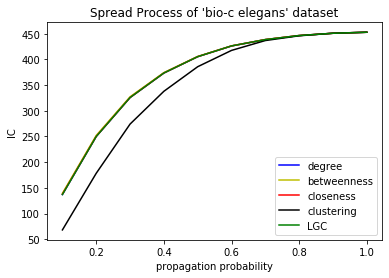

In [5]:
plt.plot(b, d, 'b', label='degree')
plt.plot(b, bw, 'y', label='betweenness')
plt.plot(b, c, 'r', label='closeness')
plt.plot(b, cc, 'black', label='clustering')
plt.plot(b, lgc, 'g', label='LGC')

plt.legend()
plt.ylabel('IC')    
plt.xlabel('propagation probability')
plt.title("Spread Process of 'bio-c elegans' dataset")
plt.show

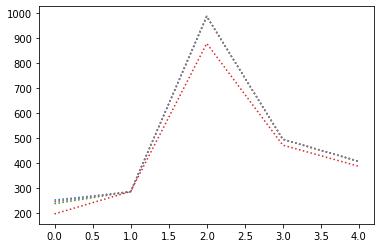

In [6]:
import numpy as np

plt.plot(np.array([250.887,284.517,986.932,494.355,405.455]), linestyle = 'dotted')
plt.plot(np.array([242.855,284.517,986.13,494.235,405.837]), linestyle = 'dotted')
plt.plot(np.array([236.255,284.517,986.145,494.255,405.455]), linestyle = 'dotted')
plt.plot(np.array([195.373,285.175,877.962,470.841,385.868]), linestyle = 'dotted')
plt.plot(np.array([245.731,284.517,986.932,494.355,405.455]), linestyle = 'dotted')


plt.show()